# Preparing Data

In [ ]:
!gdown 1rEGLQaHV16l0cKpv4zTPZs071a8YMyvl

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/task_a.csv', index_col='Unnamed: 0')
df

,file_name,meme_type,text
0,img24.jpg,hate_speech,انا نظري ضعيف ومش هخش الجيش اقسم بالله انت قناص
1,img28.jpg,hate_speech,لما فيمينست تتابع هانتر وتعرف غون بيبحث ابوه و...
2,img10.jpg,hate_speech,لا أحد النسويات
3,img7.jpg,hate_speech,يعني لو قلعنا الحجاب وتعرينا هنطلع القمر أوماااال
4,img16.jpg,hate_speech,فيمينيست عربية نفسي اطلع اوروبا حرية وتحرر و ح...
...,...,...,...
695,IMG_269.jpg,only humor,لاتوجد نساء اجمل منك مهما بحثت والله؟! يعني بح...
696,IMG_233.jpg,only humor,أنا أخوض حرب لا أعلم عنها شيئا
697,IMG_138.jpg,only humor,لما اروح عند دكتور الاسنان يادكتور بالله عليك ...
698,IMG_705.jpg,only humor,الضربة اللي متموتش تقوي لأ انا عايزاللي تموت


In [ ]:
LABELS = ['hate_speech', 'only humor', 'only offensive']
one_hot_encoded = pd.get_dummies(df.meme_type, columns=LABELS)

In [ ]:
one_hot_encoded

,hate_speech,only humor,only offensive
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
695,0,1,0
696,0,1,0
697,0,1,0
698,0,1,0


In [ ]:
df = pd.concat([ df['text'], one_hot_encoded], axis=1, join='inner')
df.columns = ['text'] + LABELS
df

,text,hate_speech,only humor,only offensive
0,انا نظري ضعيف ومش هخش الجيش اقسم بالله انت قناص,1,0,0
1,لما فيمينست تتابع هانتر وتعرف غون بيبحث ابوه و...,1,0,0
2,لا أحد النسويات,1,0,0
3,يعني لو قلعنا الحجاب وتعرينا هنطلع القمر أوماااال,1,0,0
4,فيمينيست عربية نفسي اطلع اوروبا حرية وتحرر و ح...,1,0,0
...,...,...,...,...
695,لاتوجد نساء اجمل منك مهما بحثت والله؟! يعني بح...,0,1,0
696,أنا أخوض حرب لا أعلم عنها شيئا,0,1,0
697,لما اروح عند دكتور الاسنان يادكتور بالله عليك ...,0,1,0
698,الضربة اللي متموتش تقوي لأ انا عايزاللي تموت,0,1,0


In [ ]:
RANDOM_SEED = 41
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.1, random_state=RANDOM_SEED)


In [ ]:
train_df

,text,hate_speech,only humor,only offensive
132,طريقة عمل السندوتش لما بكون لوحدي ف البيت,0,1,0
662,هل تعانين من السمنة المفرطة وتجدين صعوبة في ال...,1,0,0
451,عندما قطرعلى بالك فكرة فتقرر تحويل هاته الفكرة...,0,1,0
954,يمكنها تشم المستقبل,1,0,0
640,لما تروح تقعد مع جدتك شويه وتلاقيك قاعد ساكت ا...,0,1,0
...,...,...,...,...
627,يلا بسرعه اتاخرنا ! روحوا انتوا انا مش قادر اج...,0,1,0
243,أتقول رأيي لا يهم فقط لأنني أشاهد الأنمي,0,0,1
321,شباب راكضين يحكوا لبنت كيف تصف السيارة الحوظة ...,1,0,0
106,لما اشوف ماما بتدلع ابن اختي قدامي : ماما انا ...,0,1,0


In [ ]:
print("train_df: ", len(train_df))
print("test_df: ", len(test_df))


train_df:  1528
test_df:  170


In [ ]:
token_lens = [] 
def  calcualte_seq_length(df):
  for txt in df.text:
    tokens = txt.split()
    token_lens.append(len(tokens))
  return token_lens


In [ ]:
max_sentence_len = 32

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, GRU, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from sklearn.metrics import f1_score, jaccard_score
import matplotlib.pyplot as plt


# Load pretrained model

In [ ]:
!gdown 1P5hDh2pTeZn8-ZNdsoRjHI9V-_z24U5F


In [ ]:
import gensim 
import numpy as np

class embed(object):
    def __init__(self, path):
        self.path = path
        self._load_model()
        
    def _load_model(self):
        self.model = gensim.models.Word2Vec.load(self.path)
        self.vector_size = self.model.vector_size

    def _embed_single(self, text, max_len):
        embedding = [self.model.wv[i].reshape(-1, self.vector_size) for i in text.split() if i in self.model.wv]
        if len(embedding) == 0:
            return self._pad(np.zeros((1, self.vector_size)), max_len)
        embedding = np.concatenate(embedding, axis=0)
        return self._pad(embedding, max_len)
                    
    def embed_batch(self, text_list, max_len):
        batch = [self._embed_single(i, max_len) for i in text_list]
        return np.concatenate(batch)
    
    def _pad(self, array, max_len):
        if array.shape[0] >= max_len:
            return np.expand_dims(array[:max_len],0)
        else:
            padding_size = max_len - array.shape[0]
            return np.expand_dims(np.pad(array, [(0, padding_size), (0, 0)], mode='constant', constant_values=0), 0)

In [ ]:
!unzip '/content/full_uni_cbow_300_twitter.zip'

In [ ]:
# Load Aravec 
embedd_path = '/content/full_uni_cbow_300_twitter.mdl'
embedd_size = 300

embedder = embed(embedd_path)

In [ ]:
model_path = '/content/bi_lstm(task_a).best.hdf5'

In [ ]:
X_train = np.array(train_df.text)
Y_train = train_df[train_df.columns[1:]] .values

X_test = np.array(test_df.text)
Y_test = test_df[test_df.columns[1:]].values

# Text vectorization

In [ ]:
X_train = embedder.embed_batch(X_train, max_sentence_len)
X_test = embedder.embed_batch(X_test, max_sentence_len)

In [ ]:
X_train[1]

array([[-0.18872142, -0.03164358, -0.21963631, ...,  1.05659676,
        -2.70043159, -0.34126267],
       [-0.47469744,  0.64502686,  0.63755786, ...,  0.97368866,
        -1.21541953,  2.06629729],
       [-1.08274984, -1.14934766,  0.00636277, ...,  0.47886091,
         0.28565121, -1.29441094],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Create & Train model

In [ ]:
def create_model(max_sentence_len, embedd_size, num_labels=3):
    sentence = keras.Input(shape=(max_sentence_len, embedd_size), name='sentence')
    forward_layer = LSTM(300)
    backward_layer = LSTM(300, go_backwards=True)

    model = Sequential()
    model.add(sentence)
    
    model.add(Bidirectional(forward_layer, backward_layer=backward_layer))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_labels, activation='softmax'))
    model.compile(optimizer=Adam(0.00005), loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
earlystopping_callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=model_path,
    monitor='val_accuracy',
    mode='max',
    save_weights_only=True,
    save_best_only=True,
    verbose=1)

In [ ]:
model = create_model(max_sentence_len, embedd_size)
history = model.fit(X_train,
          Y_train,
          epochs=11,
          batch_size=50,
          validation_data = (X_test, Y_test),
          shuffle=True, 
          callbacks=[earlystopping_callback, checkpoint_callback])

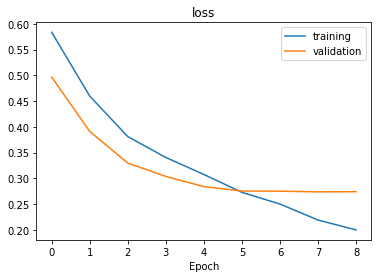

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('Epoch')
plt.show()

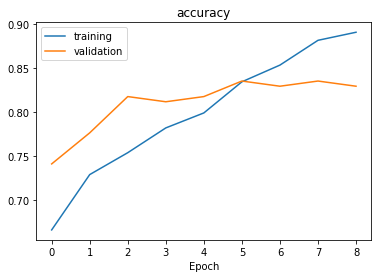

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('accuracy')
plt.xlabel('Epoch')
plt.show()

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
preds = model.predict(X_test) > 0.5

print("F1 macro:   {}".format(round(f1_score(Y_test, preds, average="macro"), 3)))
print("F1 micro:   {}".format(round(f1_score(Y_test, preds, average="micro"), 3)))
print("Recall: {}".format(round(recall_score(Y_test, preds, average="macro"), 3)))
print("Precision: {}".format(round(precision_score(Y_test, preds, average="macro"), 3)))